# Tarea de Regresión Lineal simple

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Se carga el data set de articulos escritos

In [4]:
df = pd.read_csv('../data/articulos_ml.csv')
df.head()

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000


Se desa estudiar la relación entre la cantidad de palabras vs la cantidad de shares. Tambien, se quiere conocer la relación entre la cantidad de days elapsed y la cantidad de shares

### Exploración de datos

<Axes: ylabel='Elapsed days'>

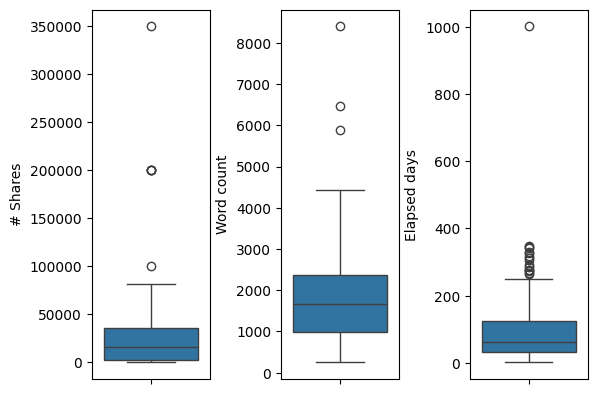

In [19]:
f, ax = plt.subplots(1,3)
f.subplots_adjust(wspace = 0.6)
sns.boxplot(y = df['# Shares'], ax = ax[0])
sns.boxplot(y = df['Word count'], ax = ax[1])
sns.boxplot(y = df['Elapsed days'], ax = ax[2])


In [58]:
shares_IQR = df['# Shares'].quantile(.75)-df['# Shares'].quantile(.25)
words_IQR = df['Word count'].quantile(.75)-df['Word count'].quantile(.25)
days_IQR = df['Elapsed days'].quantile(.75)-df['Elapsed days'].quantile(.25)

top_OL_shares = df[df['# Shares'] > df['# Shares'].quantile(.75)+1.5*shares_IQR]['# Shares'].count().tolist()
top_OL_word = df[df['Word count'] > df['Word count'].quantile(.75)+1.5*words_IQR]['Word count'].count().tolist()
top_OL_days = df[df['Elapsed days'] > df['Elapsed days'].quantile(.75)+1.5*days_IQR]['Elapsed days'].count().tolist()

print(f'Outliers Shares: {top_OL_shares}\nOutliers Word count: {top_OL_word}\nOutliers Elapsed days: {top_OL_days}')

Outliers Shares: 6
Outliers Word count: 3
Outliers Elapsed days: 16


Shares vs Word Count

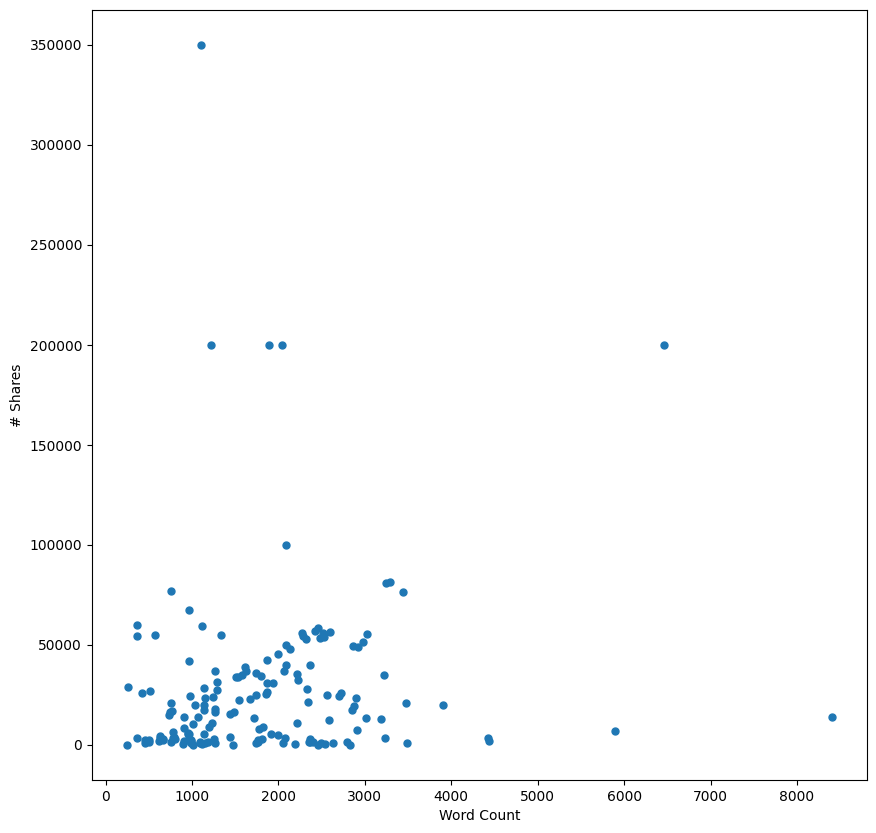

In [71]:
f1 = df['Word count'].values
f2 = df['# Shares'].values

plt.figure(figsize=(10,10))

plt.scatter(f1,f2,s=25)
plt.xlabel('Word Count')
plt.ylabel('# Shares')
plt.show()

In [70]:
shares_min_ol = df[df['# Shares'] > df['# Shares'].quantile(.75)+1.5*shares_IQR]['# Shares'].min().tolist()
word_min_ol = df[df['Word count'] > df['Word count'].quantile(.75)+1.5*words_IQR]['Word count'].min().tolist()
print(f'shares: {shares_min_ol} word: {word_min_ol}')

shares: 100000 word: 5892


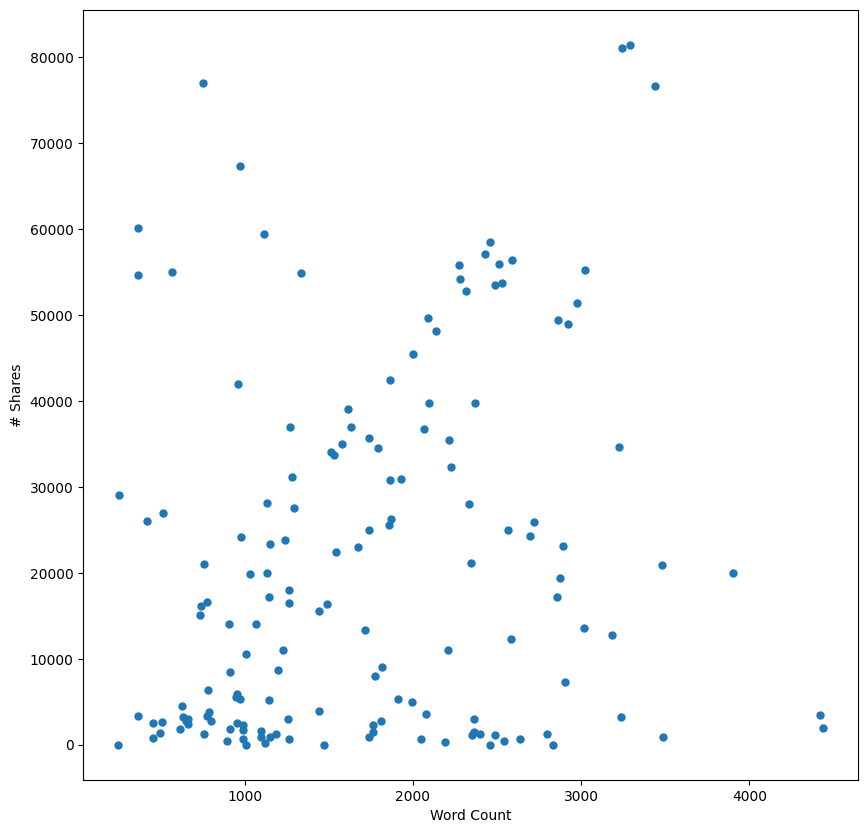

In [75]:
filtered_data_1 = df[(df['# Shares'] < shares_min_ol) & (df['Word count'] < 5892)]

f1 = filtered_data_1['Word count'].values
f2 = filtered_data_1['# Shares'].values

plt.figure(figsize=(10,10))

plt.scatter(f1,f2,s=25)
plt.xlabel('Word Count')
plt.ylabel('# Shares')
plt.show()

Shares vs Elapsed days

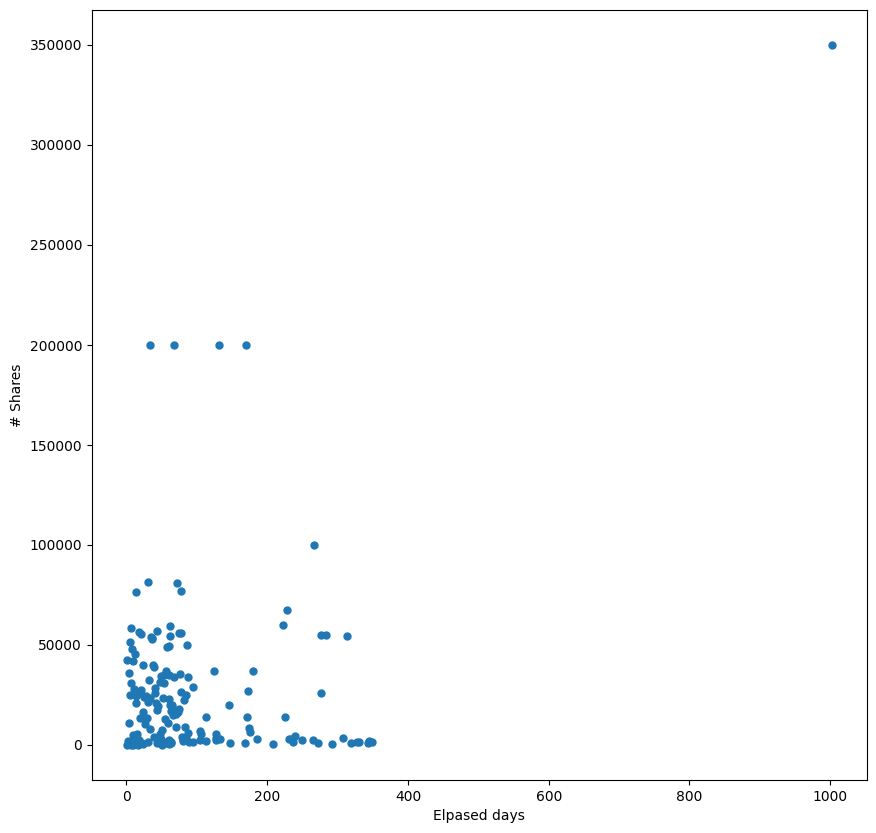

In [76]:
f1 = df['Elapsed days'].values
f2 = df['# Shares'].values

plt.figure(figsize=(10,10))

plt.scatter(f1,f2,s=25)
plt.xlabel('Elpased days')
plt.ylabel('# Shares')
plt.show()

In [78]:
days_min_ol = df[df['Elapsed days'] > df['Elapsed days'].quantile(.75)+1.5*days_IQR]['Elapsed days'].min().tolist()
print(f'shares: {shares_min_ol} word: {days_min_ol}')

shares: 100000 word: 265


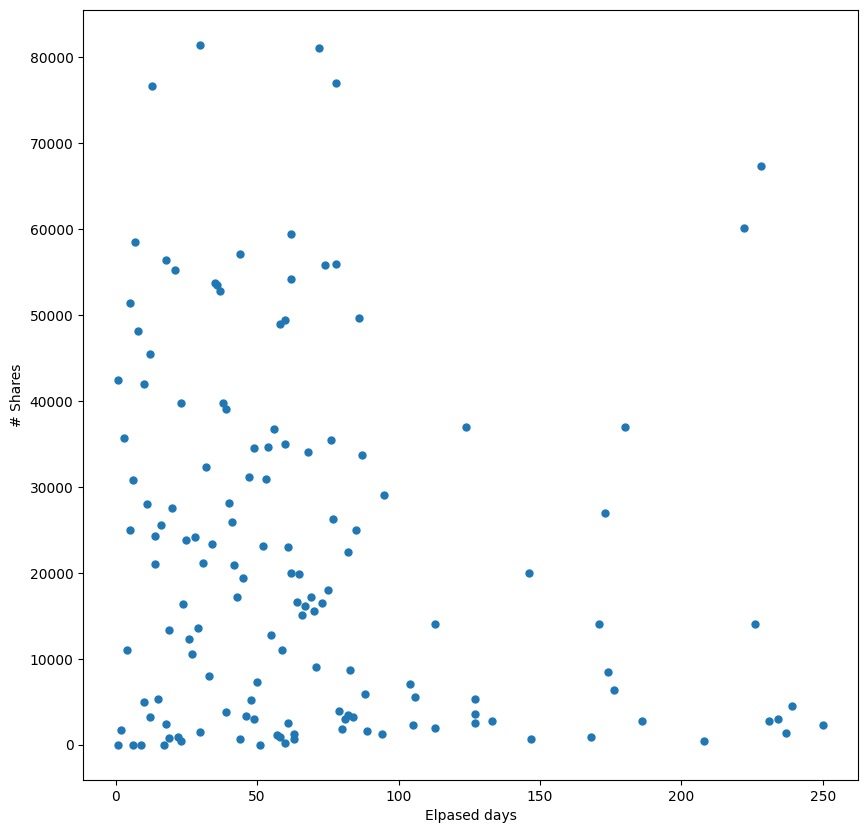

In [80]:
filtered_data_2 = df[(df['# Shares'] < shares_min_ol) & (df['Elapsed days'] < days_min_ol)]

f1 = filtered_data_2['Elapsed days'].values
f2 = filtered_data_2['# Shares'].values

plt.figure(figsize=(10,10))

plt.scatter(f1,f2,s=25)
plt.xlabel('Elpased days')
plt.ylabel('# Shares')
plt.show()

### Elaboración de los modelos de Regresión Lineal simple

Modelo para la relación entre shares y word count

In [86]:
from sklearn.linear_model import LinearRegression

X1 = filtered_data_1[['Word count']]
Y1 = filtered_data_1['# Shares']

model_1 = LinearRegression()
model_1.fit(X1, Y1)

LinearRegression()

Modelo para la relación entre shares y enlapsed days

In [92]:
X2 = filtered_data_2[['Elapsed days']]
Y2 = filtered_data_2['# Shares']

model_2 = LinearRegression()
model_2.fit(X2, Y2)

LinearRegression()

### Evaluación de los modelos

Modelo lineal para la realción entre word count y shares

In [87]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Y1_pred = model_1.predict(X1)

coef1 = model_1.coef_
intercept1 = model_1.intercept_

mse = mean_squared_error(Y1, Y1_pred)
mae = mean_absolute_error(Y1, Y1_pred)
r2 = r2_score(Y1, Y1_pred)

print('-'*10,'RESULTADOS','-'*10)
print(f'Pendiente: {coef1}\nIntercepto eje Y: {intercept1}\nMSE: {mse}\nMAE: {mae}\nR2: {r2}')

---------- RESULTADOS ----------
Pendiente: [5.27198298]
Intercepto eje Y: 12072.706689677187
MSE: 411143703.5104207
MAE: 16746.143782646617
R2: 0.05212208273282226


Text(0, 0.5, '# Shares')

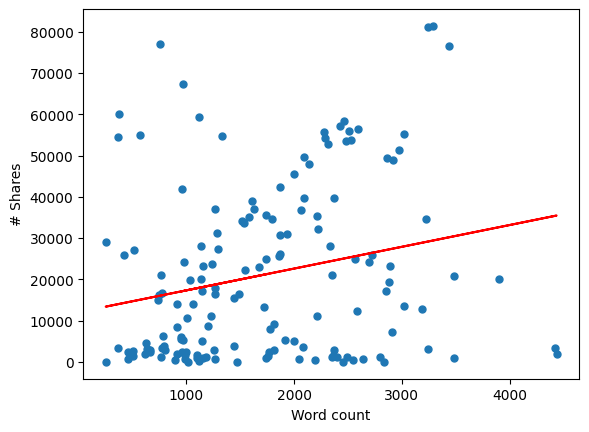

In [91]:
plt.scatter(X1,Y1, s=25)
plt.plot(X1, Y1_pred, 'r')
plt.xlabel('Word count')
plt.ylabel('# Shares')

Modelo lineal para la realción entre elapsed days y shares

In [93]:
Y2_pred = model_2.predict(X2)

coef2 = model_2.coef_
intercept2 = model_2.intercept_

mse = mean_squared_error(Y2, Y2_pred)
mae = mean_absolute_error(Y2, Y2_pred)
r2 = r2_score(Y2, Y2_pred)

print('-'*10,'RESULTADOS','-'*10)
print(f'Pendiente: {coef2}\nIntercepto eje Y: {intercept2}\nMSE: {mse}\nMAE: {mae}\nR2: {r2}')

---------- RESULTADOS ----------
Pendiente: [-60.17482487]
Intercepto eje Y: 25785.93371884956
MSE: 407674799.47706926
MAE: 16171.667222673846
R2: 0.030392038321150006


Text(0, 0.5, '# Shares')

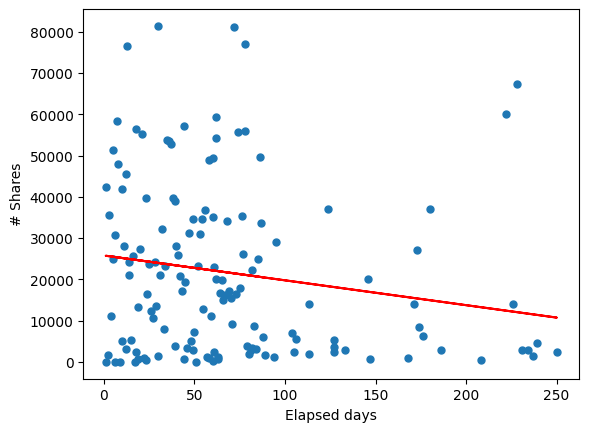

In [94]:
plt.scatter(X2,Y2, s=25)
plt.plot(X2, Y2_pred, 'r')
plt.xlabel('Elapsed days')
plt.ylabel('# Shares')